# AIT 590
# Mingtao Zhang
# Lab_1

# Import Libraries

In [1]:
import bs4 as bs  # BeautifulSoup
import urllib.request
import re

# 1. Web scraping
1 (0.5 points) Use the web scraping technique with BeautifulSoup as shown in class to get the
text data from the specified data location on the Wikipedia webpage.

In [2]:
def _scrape_webpage_fixed(url):
    """
    Use BeautifulSoup to scrape the webpage text contents.
    """    
    scraped_textdata = urllib.request.urlopen(url)
    textdata = scraped_textdata.read()
    parsed_textdata = bs.BeautifulSoup(textdata,'lxml')
    #paragraphs = parsed_textdata.find_all(['p', 'dd','li'])  #dd and li includes some informations, but some unrealted
    paragraphs = parsed_textdata.find_all(['p'])
    formated_text = ""
    
    for para in paragraphs:
        line = para.text.lower() # change to lower case
        line = re.sub(r"[^a-z\s]", "", line.strip())  # only contains english words
        formated_text += line
    
    return formated_text

In [3]:
text = _scrape_webpage_fixed('https://en.wikipedia.org/wiki/Natural_language_processing')
#text
text[0:1000]

'natural language processing nlp is a subfield of linguistics computer science and artificial intelligence concerned with the interactions between computers and human language in particular how to program computers to process and analyze large amounts of natural language datachallenges in natural language processing frequently involve speech recognition natural language understanding and naturallanguage generationnatural language processing has its roots in the s already in  alan turing published an article titled computing machinery and intelligence which proposed what is now called the turing test as a criterion of intelligence a task that involves the automated interpretation and generation of natural language but at the time not articulated as a problem separate from artificial intelligencethe premise of symbolic nlp is wellsummarized by john searles chinese room experiment given a collection of rules eg a chinese phrasebook with questions and matching answers the computer emulates

# Edit text
## 2 (3.5 points) Process the text data and must include:

### 2.1 Tokenize the words

In [4]:
import nltk  # import nltk

In [5]:
tokenizedText = nltk.word_tokenize(text)
print(len(tokenizedText))
print(tokenizedText[:30])

1235
['natural', 'language', 'processing', 'nlp', 'is', 'a', 'subfield', 'of', 'linguistics', 'computer', 'science', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to']


### 2.2 (1 point) Remove the stop words, punctuation, and digit numbers.

### Remove numbers and punctuation
This process has been done in web scraping part,
/*line = re.sub(r"[^a-z\s]", "", line.strip())  # only contains english words */

only english words are record in the text

But the function below has the same function which i used in the future

In [6]:
#from string import punctuation
#from nltk.corpus import stopwords
#stopword = stopwords.words('english')

def cleanUpSentense(token_sent):
    senttoken = nltk.word_tokenize(token_sent)
    leSent = lemmatizeWords(senttoken)  # lemmatize senstnce
    noStopwords = [word for word in leSent if word not in stopword]  # remove stop words
    formated_text = ""
    for para in noStopwords:
        line = para.lower() # change to lower case
        line = line.replace('\n','')
        outNumline = ''.join(c for c in line if not c.isdigit())  # take off number
        outPunc = ''.join(c for c in outNumline if c not in punctuation) # take off puncctutation
        formated_text += outPunc + " "
    return formated_text

#print(cleanUpSentense(token_sent[0]))

### Remove stop words

In [7]:
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [8]:
def _removeStopWords(tokenedWords):
    stopword = stopwords.words('english')
    removing_stopwords = [word for word in tokenedWords if word not in stopword]
    return removing_stopwords
cleanedTokenWords = _removeStopWords(tokenizedText)
print(len(cleanedTokenWords))
print(cleanedTokenWords[:30])

741
['natural', 'language', 'processing', 'nlp', 'subfield', 'linguistics', 'computer', 'science', 'artificial', 'intelligence', 'concerned', 'interactions', 'computers', 'human', 'language', 'particular', 'program', 'computers', 'process', 'analyze', 'large', 'amounts', 'natural', 'language', 'datachallenges', 'natural', 'language', 'processing', 'frequently', 'involve']


### 2.3 (1.5 points) write a function to lemmatize the words

In [9]:
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

In [10]:
def lemmatizeWords(tokenText):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in tokenText]
    return lemmatized_word

lemmatizedText = lemmatizeWords(cleanedTokenWords)
print(len(lemmatizedText))
print(lemmatizedText[:30])
# line 2, computers -> computer

741
['natural', 'language', 'processing', 'nlp', 'subfield', 'linguistics', 'computer', 'science', 'artificial', 'intelligence', 'concerned', 'interaction', 'computer', 'human', 'language', 'particular', 'program', 'computer', 'process', 'analyze', 'large', 'amount', 'natural', 'language', 'datachallenges', 'natural', 'language', 'processing', 'frequently', 'involve']


### 2.4 (0.4 points) Calculate the word distribution using FreqDist

In [11]:
# freq dist find the frequency of each words order DESC
freqdic = nltk.FreqDist(lemmatizedText)
freqdic

FreqDist({'language': 24, 'natural': 16, 'processing': 13, 'nlp': 11, 'task': 11, 'statistical': 11, 'machine': 9, 'algorithm': 9, 'rule': 8, 'learning': 8, ...})

### 2.5 (0.3 points) List and plot the top 15 words

In [12]:
freqdic.most_common(15)

[('language', 24),
 ('natural', 16),
 ('processing', 13),
 ('nlp', 11),
 ('task', 11),
 ('statistical', 11),
 ('machine', 9),
 ('algorithm', 9),
 ('rule', 8),
 ('learning', 8),
 ('model', 8),
 ('cognitive', 8),
 ('system', 7),
 ('word', 7),
 ('linguistics', 6)]

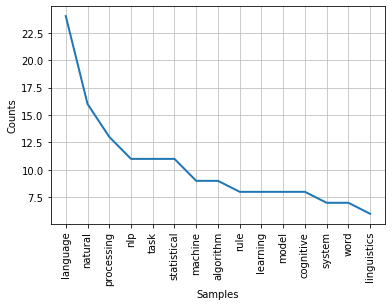

In [29]:
freqdic.plot(15)

# Summerize
## 3 (4.5 points) Summarize the text as shown in class:

### 3.1 (1.5 points) Calculate word Weighted frequency
Please specify the math formula.
Hint: it would be easy to use FreqDist to get original word frequencies

In [14]:
# download the page again
def _scrape_webpage_with(url):
    """
    Use BeautifulSoup to scrape the webpage text contents.
    """    
    scraped_textdata = urllib.request.urlopen(url)
    textdata = scraped_textdata.read()
    parsed_textdata = bs.BeautifulSoup(textdata,'lxml')
    paragraphs = parsed_textdata.find_all(['p'])
    formated_text = ""
    
    for para in paragraphs:
        line = para.text.lower() # change to lower case
        line = line.replace('\n','')
        formated_text += line
    
    return formated_text

textFull = _scrape_webpage_with('https://en.wikipedia.org/wiki/Natural_language_processing')
textFull[0:1000]

'natural language processing (nlp) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation.natural language processing has its roots in the 1950s. already in 1950, alan turing published an article titled "computing machinery and intelligence" which proposed what is now called the turing test as a criterion of intelligence, a task that involves the automated interpretation and generation of natural language, but at the time not articulated as a problem separate from artificial intelligence.the premise of symbolic nlp is well-summarized by john searle\'s chinese room experiment: given a collection of rules (e.g., a chinese phrasebook, with questions and matc

In [15]:
# store the token as sentense 
from nltk.tokenize import sent_tokenize
token_sent = sent_tokenize(textFull)
token_sent[0]

'natural language processing (nlp) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation.natural language processing has its roots in the 1950s.'

In [16]:
from string import punctuation
from nltk.corpus import stopwords
stopword = stopwords.words('english')

def cleanUpSentense(token_sent):
    senttoken = nltk.word_tokenize(token_sent)
    leSent = lemmatizeWords(senttoken)  # lemmatize senstnce
    noStopwords = [word for word in leSent if word not in stopword]  # remove stop words
    formated_text = ""
    for para in noStopwords:
        line = para.lower() # change to lower case
        #line = line.replace('\n','')
        outNumline = ''.join(c for c in line if not c.isdigit())  # take off number
        outPunc = ''.join(c for c in outNumline if c not in punctuation) # take off puncctutation
        if len(outPunc) > 1:
            formated_text += outPunc + " "
    return formated_text
#print(cleanUpSentense(token_sent[0]))

In [17]:
#clean up all the sentances in the tokenset
for idx in range(0,len(token_sent)):
    token_sent[idx] = cleanUpSentense(token_sent[idx])
token_sent[0]

'natural language processing nlp subfield linguistics computer science artificial intelligence concerned interaction computer human language particular program computer process analyze large amount natural language datachallenges natural language processing frequently involve speech recognition natural language understanding naturallanguage generationnatural language processing ha root '

### calculate the weight of each words

refernce: https://www.tutorialspoint.com/gensim/gensim_creating_tf_idf_matrix.htm

In [18]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

### The function we use is TF-IDF

weight = tf * log(N/df+1)

TF -> probability of finding a word in the docutment  ->  appearTimes / total_words or appearTimes, here I use appearTimes

IDF -> log(total sentances / sentance with this word + 1) -> +1 for regard case in 0

In [19]:
import gensim
import pprint
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel

doc_tokenized = [simple_preprocess(doc) for doc in token_sent]
dictionary = corpora.Dictionary()
BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized]
#for doc in BoW_corpus: print([[dictionary[id], freq] for id, freq in doc])


import numpy as np
tfidf = TfidfModel(BoW_corpus, smartirs='ntc')
#for doc in tfidf[BoW_corpus]: print([[dictionary[id], np.around(freq,decimals=6)] for id, freq in doc])


### 3.2 (1.5 points) Score the sentences

In [20]:
wordScore = {}
for doc in tfidf[BoW_corpus]:
    for id, req in doc:
        wordScore[dictionary[id]] = np.around(req,decimals=5)

dict(list(wordScore.items())[0:10])

{'amount': 0.1919,
 'analyze': 0.1919,
 'artificial': 0.10584,
 'computer': 0.14335,
 'concerned': 0.1919,
 'datachallenges': 0.1919,
 'frequently': 0.1919,
 'ha': 0.12879,
 'human': 0.16859,
 'intelligence': 0.21167}

In [21]:
sentScore = {}
for sent in token_sent:
    for word in nltk.word_tokenize(sent):
        if word in wordScore.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentScore.keys():
                    sentScore[sent] = wordScore[word]
                else:
                    sentScore[sent] += wordScore[word]
                    
dict(list(sentScore.items())[0:3])

{'starting late however wa revolution natural language processing introduction machine learning algorithm language processing ': 2.0461600000000004,
 'wa due steady increase computational power see moore law gradual lessening dominance chomskyan theory linguistics eg ': 3.6817300000000013,
 'transformational grammar whose theoretical underpinnings discouraged sort corpus linguistics underlies machinelearning approach language processing ': 2.90235}

# Since the score didn't went well, I choose to use other method instead of gensim

reference: https://stackabuse.com/text-summarization-with-nltk-in-python/#:~:text=Text%20summarization%20is%20a%20subdomain,and%20deep%20learning%2Dbased%20techniques.

In [22]:
sents = ""
token_sent = sent_tokenize(textFull)
for idx in range(0,len(token_sent)):
    token_sent[idx] = cleanUpSentense(token_sent[idx])
for sent in token_sent:
    sents += sent
sents = nltk.word_tokenize(sents)


#BoW
freqDict = nltk.FreqDist(sents)
max_freq = max(freqDict.values())
wordFreq = {}

for key in freqDict.keys():
    wordFreq[key] = (freqDict[key]/max_freq)

    
dict(list(wordFreq.items())[0:5])

{'natural': 0.6666666666666666,
 'language': 1.0,
 'processing': 0.5833333333333334,
 'nlp': 0.4583333333333333,
 'subfield': 0.041666666666666664}

In [23]:
# find TF
wordCnt = dict.fromkeys(sents, 0)
totalCnt = len(sents);
for word in sents:
    wordCnt[word] += 1

    
tfDict = {}
for word, cnt in wordCnt.items():
    tfDict[word] = cnt / totalCnt

dict(list(tfDict.items())[0:5])

{'natural': 0.021361815754339118,
 'language': 0.03204272363150868,
 'processing': 0.018691588785046728,
 'nlp': 0.014686248331108143,
 'subfield': 0.0013351134846461949}

In [24]:
# find IDF
import math

idfDict = dict.fromkeys(sents, 0)
for word, cnt in wordCnt.items():
    if cnt > 0:
        idfDict[word] += 1
for word, cnt in idfDict.items():
    idfDict[word] = math.log(totalCnt / (cnt + 1))

dict(list(idfDict.items())[0:5])

{'natural': 5.925591802957274,
 'language': 5.925591802957274,
 'processing': 5.925591802957274,
 'nlp': 5.925591802957274,
 'subfield': 5.925591802957274}

In [25]:
# get tfidf
tfidf = {}
for word, cnt in tfDict.items():
    tfidf[word] = cnt * idfDict[word]

dict(list(tfidf.items())[0:5])

{'natural': 0.12658140033019544,
 'language': 0.18987210049529316,
 'processing': 0.110758725288921,
 'nlp': 0.08702471272700936,
 'subfield': 0.007911337520637215}

## Score of sentence

In [26]:
sentenceScore = {}
token_sent = sent_tokenize(textFull)

for sent in token_sent:
    for word in nltk.word_tokenize(sent):
        if word in tfidf.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentenceScore.keys():
                    sentenceScore[sent] = tfidf[word]
                else:
                    sentenceScore[sent] += tfidf[word]

dict(list(sentenceScore.items())[0:3])

{'starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing.': 0.957271839997103,
 "this was due to both the steady increase in computational power (see moore's law) and the gradual lessening of the dominance of chomskyan theories of linguistics (e.g.": 0.18987210049529318,
 'transformational grammar), whose theoretical underpinnings discouraged the sort of corpus linguistics that underlies the machine-learning approach to language processing.': 0.5063256013207817}

### 3.3 (1.5 points) Build a summary (based on ratio, sentence or word count, etc.)

In [27]:
import heapq
summary_sentences = heapq.nlargest(7, sentenceScore, key=sentenceScore.get)
summary = ' '.join(summary_sentences)
print(summary)

starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing. transformational grammar), whose theoretical underpinnings discouraged the sort of corpus linguistics that underlies the machine-learning approach to language processing. increasingly, however, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to each input feature. the cache language models upon which many speech recognition systems now rely are examples of such statistical models. when used as a stative verb, as in ”tomorrow is a big day”, a likely inference of the author’s intent it that ”big” is being used to imply ”importance”. since the early 2010s,[16] the field has thus largely abandoned statistical methods and shifted to neural networks for machine learning. [26] cognitive linguistics is an interdisciplinary branch of linguistics, combini

## 4 (0.5 point) Summarize the same text data using Gensim with TextRank

In [28]:
from gensim.summarization import summarize
summarize(textFull)

'already in 1950, alan turing published an article titled "computing machinery and intelligence" which proposed what is now called the turing test as a criterion of intelligence, a task that involves the automated interpretation and generation of natural language, but at the time not articulated as a problem separate from artificial intelligence.the premise of symbolic nlp is well-summarized by john searle\'s chinese room experiment: given a collection of rules (e.g., a chinese phrasebook, with questions and matching answers), the computer emulates natural language understanding (or other nlp tasks) by applying those rules to the data it is confronted with.up to the 1980s, most natural language processing systems were based on complex sets of hand-written rules.\nthis was due to both the steady increase in computational power (see moore\'s law) and the gradual lessening of the dominance of chomskyan theories of linguistics (e.g. transformational grammar), whose theoretical underpinning

## 5 (1 point) Compare 3.1 method with Gensim-TextRank. What’s different and why? Could your methods be improved? And How to improve? Please clearly explain.

### Difference: 
Summarized with gensim will contains a lot of useless numbers and punctuations. This is avoid by clean up during our section. But their summarized includes more information than use since they are having a bigger and better score system. Its IDF score has a larger base than mine. This makes its acuracy become highter than mine.

Although I can acurately calculate the TF score for my document. The biggest problem for my project is lack of paragraphs and inaccurate word scores. In order to improve it, i will use outsoucre, like some APIs to calcualte the IDF score for me. A larger system will give back a better score.

Another way I can imporve it is to use webScraping method to download multiple related pages to increase my IDF score.

